<a href="https://colab.research.google.com/github/RaviKiran752/Machine-Learning/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [8]:
import pandas as pd
import numpy as np
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
target=pd.DataFrame(housing.target,columns=housing.target_names)

In [19]:
target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [20]:
X=housing_df
y=target

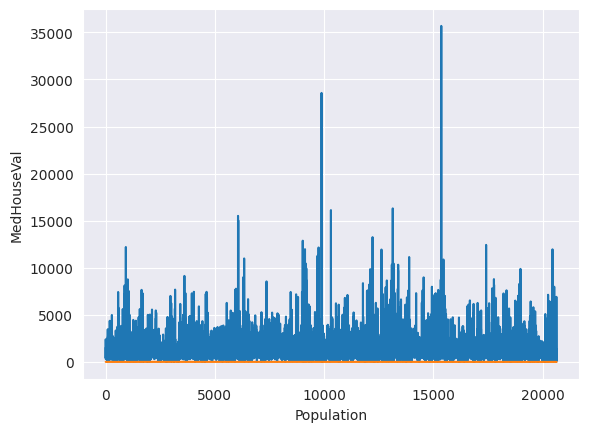

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.plot(housing_df['Population'])
plt.plot(target['MedHouseVal'])
plt.xlabel('Population')
plt.ylabel('MedHouseVal')
plt.show()

In [22]:
housing_df.isnull().sum(),target.isnull().sum()

(MedInc        0
 HouseAge      0
 AveRooms      0
 AveBedrms     0
 Population    0
 AveOccup      0
 Latitude      0
 Longitude     0
 dtype: int64,
 MedHouseVal    0
 dtype: int64)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (13828, 8)
y_train shape: (13828, 1)
X_test shape: (6812, 8)
y_test shape: (6812, 1)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
pred=lr.predict(X_test)
mean_squared_error(y_test,pred)

0.5369686543372453